In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from math import sin, sqrt, pi

## Two non-interacting particles

This code and these plots explore Hinchliffe Section 12.6, pages 181 to 184. In this Section, the author explores the concepts of particle indistinguishability, symmetric, and antisymmetric wavefunctions. I recommend you read the text for a complete treatment of these concepts. However, I cover the essentials here.

We can write a wavefunction and total energy for two non-interacting particles in a one-dimensional box as:

$$ \psi_{n_A,n_B}(x_A, x_B) = \frac{2}{L} \sin\Bigl(\frac{n_A \pi x_A}{L}\Bigr) \sin\Bigl(\frac{n_B \pi x_B}{L}\Bigr) $$

$$ E_{n_A,n_B} = (n_{A}^2+n_{B}^2) \frac{h^2}{8mL^2} $$

$$ n_A, n_B = 1, 2, 3,\dots $$

$$ 0 < x_A < L $$

$$ 0 < x_B < L $$

Since these are two separate particles, we can suppose they have a different quantum number and create the following (naive) probability density expression:

$$ (\psi_{n_A, n_B})^2 = \Biggl(\frac{2}{L} \sin\Bigl(\frac{n_A \pi x_A}{L}\Bigr) \sin\Bigl(\frac{n_B \pi x_B}{L}\Bigr)\Biggr)^2 $$

However, the problem with this equation is that it treats the particles as distinguishable, and this assumption violates our requirements of indistinguishable particles.

We need a wavefunction that yields the same probability density regardless of which particle is at what energy level, which preserves the indistinguishability requirement. We achieve this by adding or subtracting two wavefunctions. Adding gives us a symmetric wavefunction; subtracting gives us an antisymmetric wavefunction. Symmetric total wavefunctions maintain their sign if we swap the underlying individual wavefunctions. On the other hand, antisymmetric wavefunctions change their sign when we switch the underlying individual wavefunctions. This gives us two more equations, each with an appropriate normalization constant.

Symmetric:

$$ \psi_s(x_A, x_B) = \sqrt\frac{1}{2} \bigl(\psi_{1,2}(x_A, x_B) + \psi_{2,1}(x_A, x_B)\bigr) $$

Antisymmetric:

$$ \psi_a(x_A, x_B) = \sqrt\frac{1}{2} \bigl(\psi_{1,2}(x_A, x_B) - \psi_{2,1}(x_A, x_B)\bigr) $$

In [3]:
class TwoNonInteractingInABox:
    """
    This class models two non-interacting particles in a one dimensional box.
    """
    
    def __init__(self, mass=1, length=1):
        """
        Mass and length can be in whatever units you like, but
        make sure these units are consistent with each other
        to give meaningful results.
        
        This class assumes the mass of each particle is the same.
        
        Parameters
        ----------
        mass: float
            The mass of each particle
            
        length: float
            The length of the one-dimensional box
        """
        self.mass = mass
        self.length = length
    
    def wavefunction(self, na, nb, xa, xb):
        """
        Returns the value of the wavefunction of the two non-interacting
        particles.
        
        For xa and xb:
        
        0 < xa < self.length
        0 < xb < self.length
        
        Parameters
        ----------
        na: int
            The quantum number of particle a.
        
        nb: int
            The quantum number of particle b.
            
        xa: float
            The position of particle a.
        
        xb: float
            The position of particle b.
        
        Returns
        -------
        float
            value of the wavefunction.
        """
        return 2 / self.length * sin(na * pi * xa / self.length) * sin(nb * pi * xb / self.length)
    
    def symmetric(self, na, nb, xa, xb):
        """
        Returns the value symmetric wavefunction of the two non-interacting
        particles.
        
        na: int
            Quantum number of particle a.
            
        nb: int
            Quantum number of particle b.
            
        xa: float
            Position of particle a.
            
        xb: float
            Position of particle b
            
        Returns
        -------
        float
            Value of the symmetric wavefunction
        """
        return sqrt(0.5) * (self.wavefunction(na, nb, xa, xb) + self.wavefunction(nb, na, xa, xb))
    
    def antisymmetric(self, na, nb, xa, xb):
        """
        Returns the value antisymmetric wavefunction of the two non-interacting
        particles.
        
        na: int
            Quantum number of particle a.
            
        nb: int
            Quantum number of particle b.
            
        xa: float
            Position of particle a.
            
        xb: float
            Position of particle b
            
        Returns
        -------
        float
            Value of the antisymmetric wavefunction
        """
        return sqrt(0.5) * (self.wavefunction(na, nb, xa, xb) - self.wavefunction(nb, na, xa, xb))
    
    def prob_density(self, na, nb, symmetric=True, points=100):
        """
        Returns all the arrays to plot surface or contour plots of the 
        probability density as a function of xa and xb (the positions of
        each particle).
        
        Parameters
        ----------
        na: int
            Quantum number of particle a
            
        nb: int
            Quantum number of particle b
            
        symmetric: bool
            True if the symmetric probability density is needed. False if the
            antisymmetric desnity is needed.
        
        points: int
            How many points along each axis to sample on the surface.
        
        Returns
        -------
        np.array, np.array, np.array
            First array is the 1d array of xa points. Second array is 1d array of
            xb points. Third array is two dimensional array of probability density
            at the intersection of the positions of the two particles.
        """
        xas = np.linspace(0.0, self.length, points)
        xbs = np.linspace(0.0, self.length, points)
        zs = np.zeros((points, points), np.float64)
        for ixa, xa in enumerate(xas):
            for ixb, xb in enumerate(xbs):
                if symmetric:
                    zs[ixa, ixb] = self.symmetric(na, nb, xa, xb) ** 2
                else:
                    zs[ixa, ixb] = self.antisymmetric(na, nb, xa, xb) ** 2
        return xas, xbs, zs

### Symmetric probability density

Surface plot and contour plot of the probability density of two interacting particles.

Note that the following surface or contour plot pairs look the same:

+ na = 1, nb = 2 and na = 2, nb = 1
+ na = 1, nb = 3 and na = 3, nb = 1
+ na = 2, nb = 3 and na = 3, nb = 2

This similarity in the probability densities arises from the interchangeability of the particles in the symmetric wavefunction.

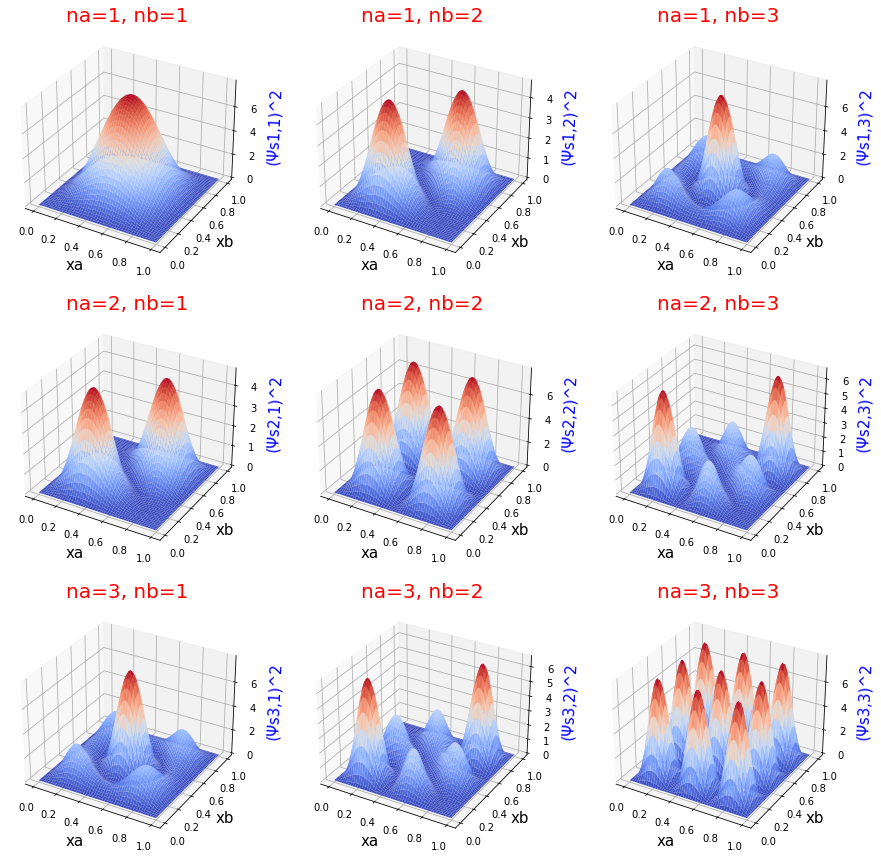

In [19]:
box = TwoNonInteractingInABox(mass=1.0, length=1.0)
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15), subplot_kw={"projection": "3d"})
nas = [1, 2, 3]
nbs = [1, 2, 3]
for ina, na in enumerate(nas):
    for inb, nb in enumerate(nbs):
        xas, xbs, zs = box.prob_density(na=na, nb=nb, symmetric=True)
        xs, ys = np.meshgrid(xas, xbs)
        ax = axs[ina, inb]
        ax.set_xlabel('xa', size=15)
        ax.set_ylabel('xb', size=15)
        ax.set_zlabel(f'(Ψs{na},{nb})^2', size=15, color='b')
        ax.set_title(f'na={na}, nb={nb}', size=20, color='r')
        ax.plot_surface(ys, xs, zs, cmap=cm.coolwarm, linewidth=0, antialiased=True)

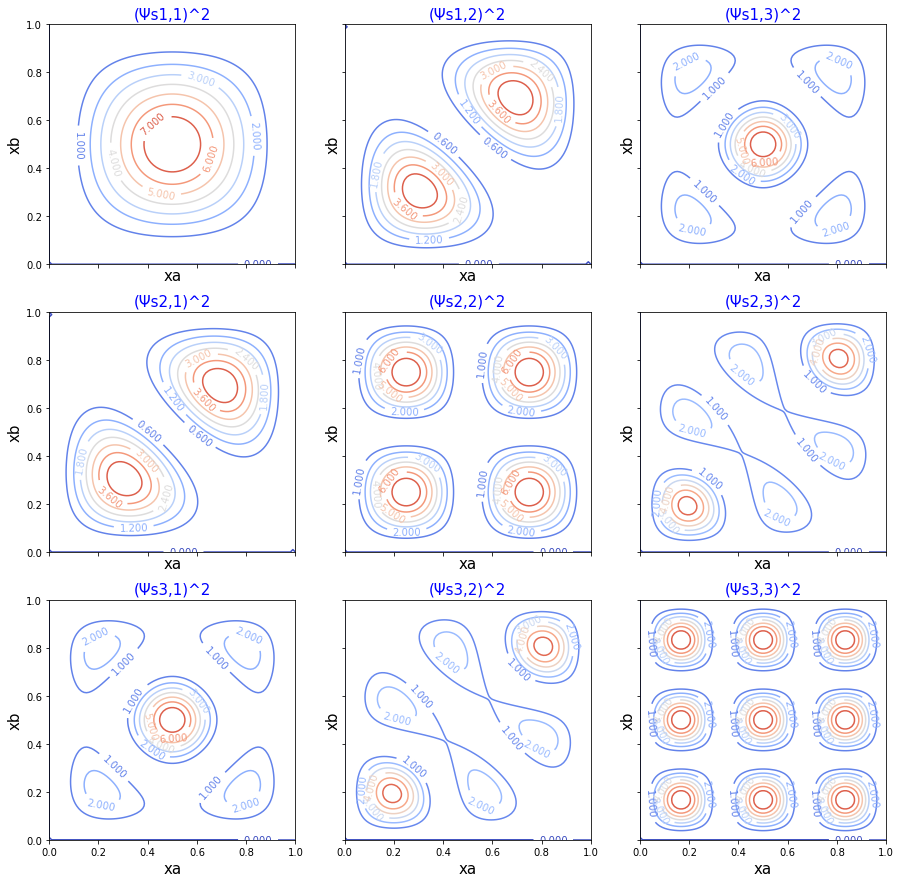

In [15]:
box = TwoNonInteractingInABox(mass=1.0, length=1.0)
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15), sharex=True, sharey=True)
nas = [1, 2, 3]
nbs = [1, 2, 3]
for ina, na in enumerate(nas):
    for inb, nb in enumerate(nbs):
        xas, xbs, zs = box.prob_density(na=na, nb=nb, symmetric=True)
        xs, ys = np.meshgrid(xas, xbs)
        ax = axs[ina, inb]
        ax.set_xlabel('xa', size=15)
        ax.set_ylabel('xb', size=15)
        ax.set_title(f'(Ψs{na},{nb})^2', size=15, color='b')
        cs = ax.contour(ys, xs, zs, cmap=cm.coolwarm, antialiased=True)
        ax.clabel(cs, inline=True, fontsize=10)

### Antisymmetric probability density

Surface plot and contour plot of the probability density of two interacting particles.

Note that, as for the symmetrical plots, the following surface or contour plot pairs look the same:

+ na = 1, nb = 2 and na = 2, nb = 1
+ na = 1, nb = 3 and na = 3, nb = 1
+ na = 2, nb = 3 and na = 3, nb = 2

This similarity in the probability densities arises from the interchangeability of the particles in the symmetric wavefunction.

Also, note in the plots where "na=nb," the probability density is zero. This zero probability density is because fermions are particles with antisymmetric wavefunctions, which means that multiple fermions cannot occupy the same quantum numbers. Fermions have antisymmetric wavefunctions. Our little antisymmetric probability densities go to zero when we attempt to place the two particles in the same quantum state.

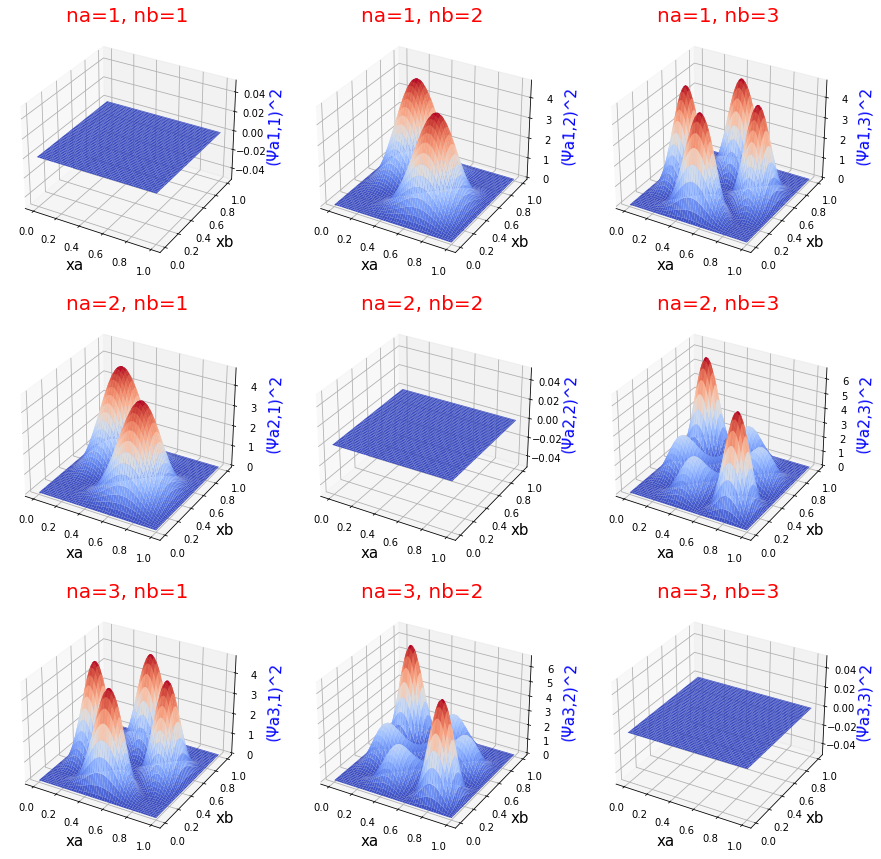

In [21]:
box = TwoNonInteractingInABox(mass=1.0, length=1.0)
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15), subplot_kw={"projection": "3d"})
nas = [1, 2, 3]
nbs = [1, 2, 3]
for ina, na in enumerate(nas):
    for inb, nb in enumerate(nbs):
        xas, xbs, zs = box.prob_density(na=na, nb=nb, symmetric=False)
        xs, ys = np.meshgrid(xas, xbs)
        ax = axs[ina, inb]
        ax.set_xlabel('xa', size=15)
        ax.set_ylabel('xb', size=15)
        ax.set_zlabel(f'(Ψa{na},{nb})^2', size=15, color='b')
        ax.set_title(f'na={na}, nb={nb}', size=20, color='r')
        ax.plot_surface(ys, xs, zs, cmap=cm.coolwarm, linewidth=0, antialiased=True)

<ipython-input-18-afbdde510de6>:13: UserWarning: No contour levels were found within the data range.
  cs = ax.contour(ys, xs, zs, cmap=cm.coolwarm, antialiased=True)


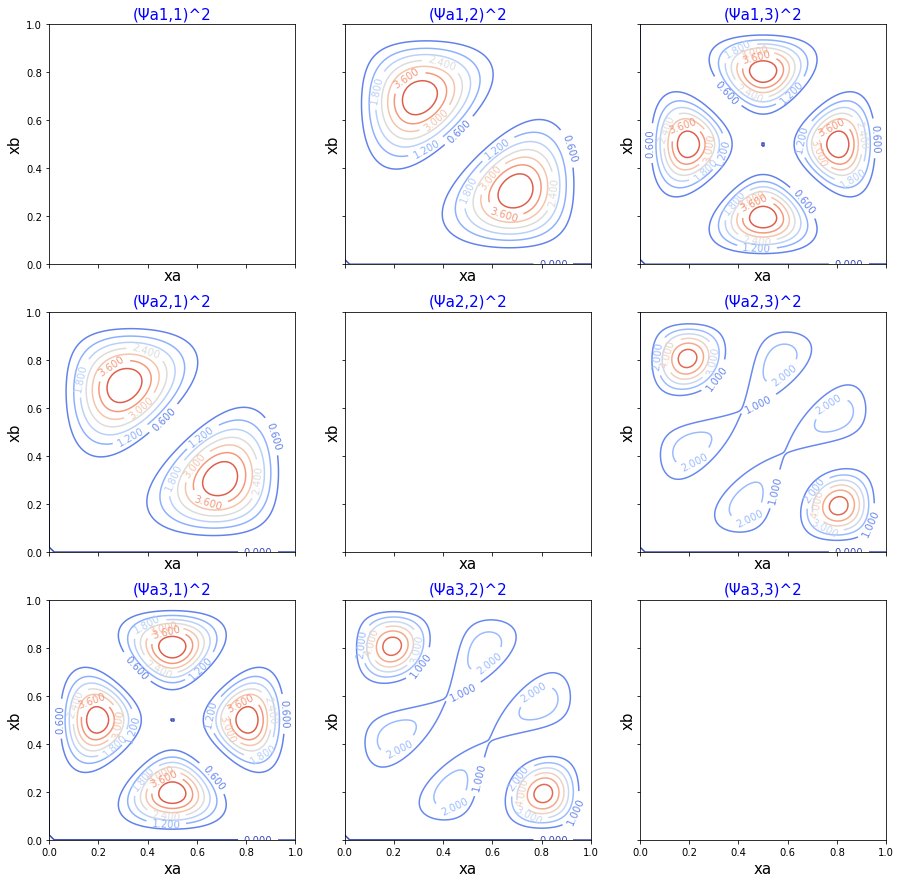

In [18]:
box = TwoNonInteractingInABox(mass=1.0, length=1.0)
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15), sharex=True, sharey=True)
nas = [1, 2, 3]
nbs = [1, 2, 3]
for ina, na in enumerate(nas):
    for inb, nb in enumerate(nbs):
        xas, xbs, zs = box.prob_density(na=na, nb=nb, symmetric=False)
        xs, ys = np.meshgrid(xas, xbs)
        ax = axs[ina, inb]
        ax.set_xlabel('xa', size=15)
        ax.set_ylabel('xb', size=15)
        ax.set_title(f'(Ψa{na},{nb})^2', size=15, color='b')
        cs = ax.contour(ys, xs, zs, cmap=cm.coolwarm, antialiased=True)
        ax.clabel(cs, inline=True, fontsize=10)